In [ ]:
!git clone https://github.com/OpenNeuroDatasets/ds003004.git

Cloning into 'ds003004'...
remote: Enumerating objects: 1872, done.
remote: Counting objects: 100% (1872/1872), done.
remote: Compressing objects: 100% (1162/1162), done.
remote: Total 1872 (delta 288), reused 1862 (delta 278), pack-reused 0
Receiving objects: 100% (1872/1872), 265.50 KiB | 6.47 MiB/s, done.
Resolving deltas: 100% (288/288), done.


In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import mne

In [ ]:
!gdown 13LzjfMFQn61RATsGj8Uu0A42wZ3xP8yq

Downloading...
From: https://drive.google.com/uc?id=13LzjfMFQn61RATsGj8Uu0A42wZ3xP8yq
To: /content/sub-01_task-ImaginedEmotion_eeg.set
100% 5.28M/5.28M [00:00<00:00, 33.5MB/s]


In [ ]:
f = open("/content/ds003004/sub-20/eeg/sub-20_task-ImaginedEmotion_eeg.json")
sub = json.load(f)

In [ ]:
sub

{'Manufacturer': 'BioSemi',
 'CapManufacturersModelName': 'Electro-Cap International',
 'CapManufacturer': 'SA Instruments',
 'InstitutionAddress': '9500 Gilman Dr, Dept 0523, La Jolla, CA 92093, USA',
 'InstitutionalDepartmentName': 'Swartz Center for Computational Neuroscience',
 'InstitutionName': 'Institute for Neural Computation',
 'Instructions': 'Subjects were instructed to use whatever imagery they deemed suitable for stimulating a vivid and embodied experience of the suggested emotion, and were encouraged to pay attention to somatic sensations associated with the target emotion. Subjects were told to take as much time as they needed to recall or imagine a scenario that would induce a realistic experience of the suggested emotion. Sixteen of the subjects indicated the onset of the suggested emotion by pressing a right-hand button. Eleven other subjects were asked to make pulsating button presses on a pressure sensitive key, attempting to communicate the quality of the feeling t

In [ ]:
f = open("/content/ds003004/sub-20/eeg/sub-20_task-ImaginedEmotion_events.json")
sub = json.load(f)

In [ ]:
sub

{'duration': {'LongName': 'Event duration',
  'Description': 'Duration of the event (measured from onset) in seconds. Must always be either zero or positive. A "duration" value of zero implies that the delta function or event is so short as to be effectively modeled as an impulse.',
  'Units': 'second'},
 'onset': {'LongName': 'Event onset',
  'Description': 'Onset (in seconds) of the event measured from the beginning of the acquisition of the first volume in the corresponding task imaging data file',
  'Units': 'second'},
 'value': {'LongName': 'Event marker',
  'Description': 'Marker value associated with the event',
  'Levels': {'press1': "'press1’ events are when the subject indicated with a button press that they were starting to feel the specified emotion",
   'press': '‘press’ events are subsequent pressure-sensing button presses meant to express the specified emotion, not all subjects were instructed to express the emotions in this way and would be missing these press events',


In [ ]:
!ls /content/ds003004/sub-20/eeg #list of file for each patients

sub-20_task-ImaginedEmotion_channels.tsv      sub-20_task-ImaginedEmotion_eeg.set
sub-20_task-ImaginedEmotion_coordsystem.json  sub-20_task-ImaginedEmotion_electrodes.tsv
sub-20_task-ImaginedEmotion_eeg.fdt	      sub-20_task-ImaginedEmotion_events.json
sub-20_task-ImaginedEmotion_eeg.json	      sub-20_task-ImaginedEmotion_events.tsv


In [ ]:
!pip install pymatreader

In [ ]:
!wget https://s3.amazonaws.com/openneuro.org/ds003004/sub-20/eeg/sub-20_task-ImaginedEmotion_eeg.set
!wget https://s3.amazonaws.com/openneuro.org/ds003004/sub-20/eeg/sub-20_task-ImaginedEmotion_eeg.fdt

--2024-03-21 17:16:23--  https://s3.amazonaws.com/openneuro.org/ds003004/sub-20/eeg/sub-20_task-ImaginedEmotion_eeg.set
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.226.8, 52.217.224.168, 16.182.36.232, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.226.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5119805 (4.9M) [application/octet-stream]
Saving to: ‘sub-20_task-ImaginedEmotion_eeg.set’

sub-20_task-Imagine 100%[===================>]   4.88M  --.-KB/s    in 0.1s    

2024-03-21 17:16:24 (33.1 MB/s) - ‘sub-20_task-ImaginedEmotion_eeg.set’ saved [5119805/5119805]

--2024-03-21 17:16:24--  https://s3.amazonaws.com/openneuro.org/ds003004/sub-20/eeg/sub-20_task-ImaginedEmotion_eeg.fdt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.226.8, 52.217.224.168, 16.182.36.232, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.226.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992935936 (947M) [ap

In [ ]:
eeg = mne.io.read_raw_eeglab("/content/sub-20_task-ImaginedEmotion_eeg.set",preload = True) #instantiate to load the file. but need to redownload the .set and .fdt file. since git cloning is only showing symbolic link of the file

Reading /content/sub-20_task-ImaginedEmotion_eeg.fdt
Reading 0 ... 1138687  =      0.000 ...  4447.996 secs...


In [ ]:
label = mne.read_labels_from_annot(eeg._annotations[0])

Reading labels from parcellation...


KeyError: 'Key "SUBJECTS_DIR" not found in the environment or in the the mne-python config file (/root/.mne/mne-python.json). Try either os.environ["SUBJECTS_DIR"] = VALUE for a temporary solution, or mne.utils.set_config("SUBJECTS_DIR", VALUE, set_env=True) for a permanent one. You can also set the environment variable before running python.'

In [ ]:
eeg.__dict__

{'_last_samps': array([1138687]),
 '_first_samps': array([0]),
 'info': <Info | 8 non-empty values
  bads: []
  ch_names: A3, A4, A5, A6, A7, A8, A9, A10, A12, A13, A14, A15, A16, A17, ...
  chs: 218 EEG
  custom_ref_applied: False
  dig: 221 items (3 Cardinal, 218 EEG)
  highpass: 0.0 Hz
  lowpass: 128.0 Hz
  meas_date: unspecified
  nchan: 218
  projs: []
  sfreq: 256.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
        

In [ ]:
eeg._annotations[23]

OrderedDict([('onset', 1544.933594),
             ('duration', 0.0),
             ('description', 'enter'),
             ('orig_time', None)])

In [ ]:
for i in range(50):
    print(eeg._annotations[i])

OrderedDict([('onset', 3.226562), ('duration', 0.0), ('description', 'InitialInstructions'), ('orig_time', None)])
OrderedDict([('onset', 103.226562), ('duration', 0.0), ('description', 'prebase_instruct'), ('orig_time', None)])
OrderedDict([('onset', 113.675781), ('duration', 0.0), ('description', 'prebase'), ('orig_time', None)])
OrderedDict([('onset', 233.675781), ('duration', 0.0), ('description', 'exit'), ('orig_time', None)])
OrderedDict([('onset', 233.992188), ('duration', 0.0), ('description', 'FeelingItInstructionsNoButton'), ('orig_time', None)])
OrderedDict([('onset', 269.925781), ('duration', 0.0), ('description', 'InstructionsForEnding'), ('orig_time', None)])
OrderedDict([('onset', 333.945312), ('duration', 0.0), ('description', 'relax'), ('orig_time', None)])
OrderedDict([('onset', 619.351562), ('duration', 0.0), ('description', 'ImaginationSuggestions'), ('orig_time', None)])
OrderedDict([('onset', 680.980469), ('duration', 0.0), ('description', 'enter'), ('orig_time', 

Using matplotlib as 2D backend.


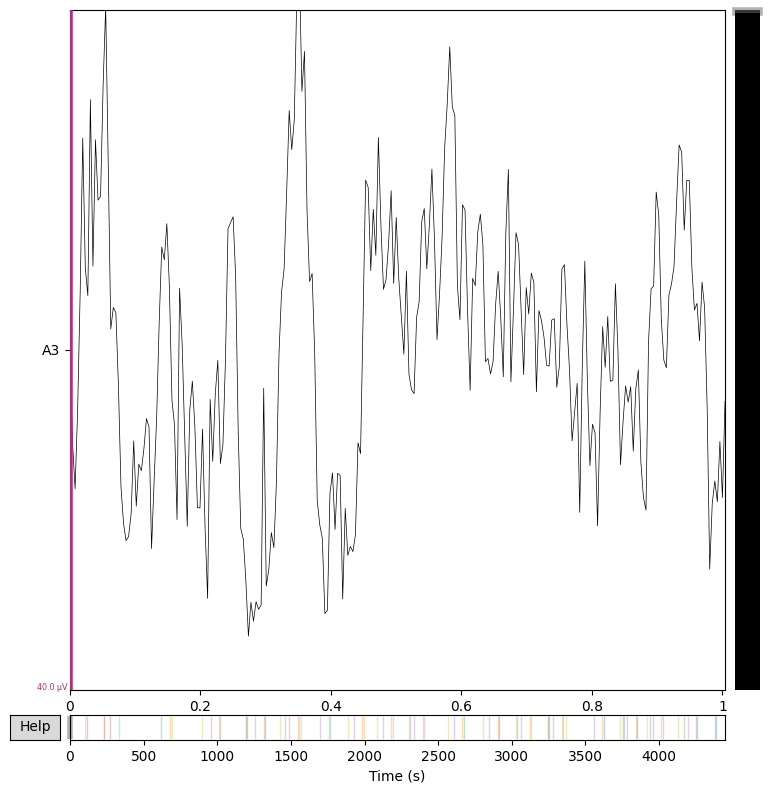

In [ ]:
n_channels = 1#number of channel that we want to view in the plot
dur = 1   #adjustable duration, represents in minutes
sig = eeg.plot(n_channels = n_channels, duration = dur)


In [ ]:
sig = eeg.get_data(picks = ['A3'])
sig.__dict__

AttributeError: 'numpy.ndarray' object has no attribute '__dict__'

In [ ]:
sig.shape

(1, 1138688)

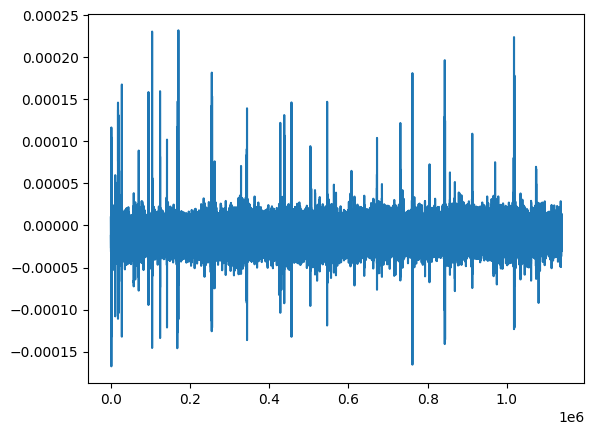

In [ ]:
plt.plot(sig.reshape(-1))

In [ ]:
df = pd.DataFrame(data = sig.reshape(-1))

In [ ]:
df.to_csv('signal_1min.csv', index = False)

In [ ]:
patient = 20
df = pd.read_csv(f"/content/ds003004/sub-{patient}/eeg/sub-{patient}_task-ImaginedEmotion_electrodes.tsv", sep = "\t")

In [ ]:
df.columns

Index(['name', 'x', 'y', 'z'], dtype='object')

In [ ]:
df

,name,x,y,z
0,A2,0.07,0.05,0.02
1,A3,0.07,0.05,0.04
2,A4,0.06,0.05,0.06
3,A5,0.05,0.04,0.07
4,A6,0.03,0.05,0.08
...,...,...,...,...
209,EXG1,0.07,-0.05,-0.03
210,EXG2,0.08,-0.03,-0.04
211,EXG3,0.09,0.03,-0.03
212,EXG5,0.09,0.01,0.02


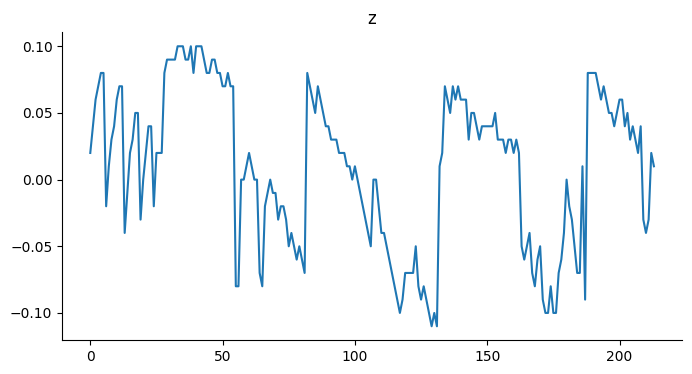

In [ ]:
# @title z

from matplotlib import pyplot as plt
df['z'].plot(kind='line', figsize=(8, 4), title='z')
plt.gca().spines[['top', 'right']].set_visible(False)

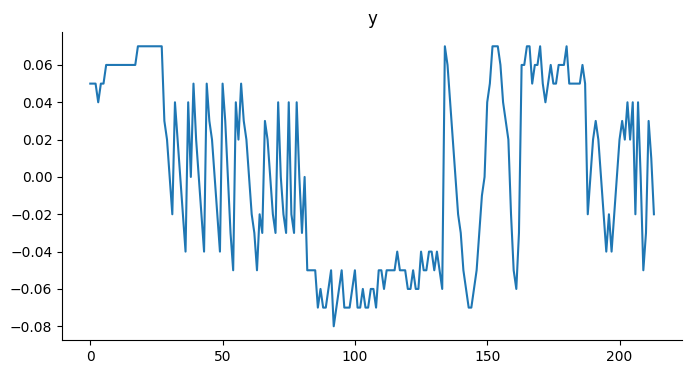

In [ ]:
# @title y

from matplotlib import pyplot as plt
df['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

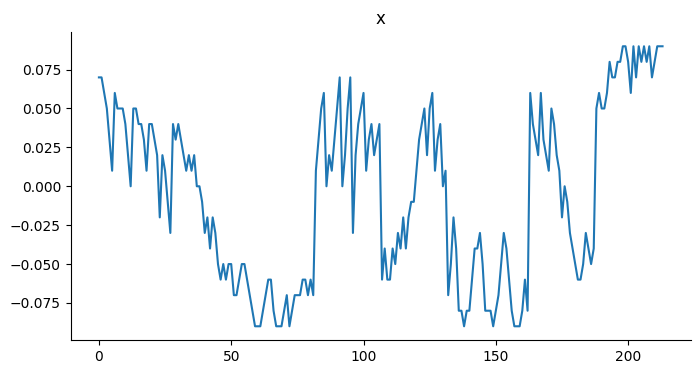

In [ ]:
# @title x

from matplotlib import pyplot as plt
df['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt

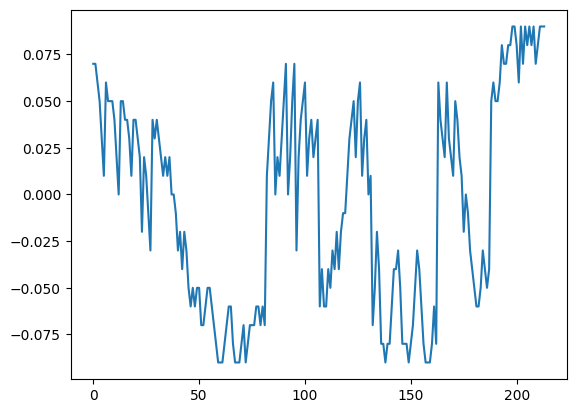

In [ ]:
plt.plot(df['x'])